In [1]:
shape_cat=""
vol=""
z_range=""

In [2]:
# Parameters
shape_cat = "mcal"
vol = "vlim"
z_range = "low_z"


In [3]:
#This header file contains all the common packages
%matplotlib inline
%run /home/cz136/project/sa/lib/src/header.py $shape_cat $vol $z_range 
%run -i /home/cz136/project/sa/lib/src/func.py  

In [4]:
sep="------------------------------------------------------------------------------"
np.set_printoptions(precision=4)

In [5]:
NBINS=10

In [6]:
import treecorr
import astropy.cosmology
from fastprogress import master_bar, progress_bar
from ipywidgets import FloatProgress
from IPython.display import display
from tqdm import tqdm

In [7]:
assert np.isin(shapes['All','MEM_MATCH_ID'].to_numpy(),clusters.index.to_numpy()).all()==True

In [8]:
def get_ng(cluster,mode1,mode2):
    if mode2=="abs":
        UPPER_BOUND=np.max(shapes[('All','R')])
        distance=('All','angR')
        
    elif mode2=="rel":
        UPPER_BOUND=1.2
        distance=('All','normLR')
    else:
        raise

    if mode1 == "s":
        def get_cluster_cen(cluster):
            return (get_unique_center_for_cluster(cluster))
        def get_cluster_sats(cluster):
            cen_mat_id=cluster.name
            cen_id=cluster[('Alt','Alt1','ID_CENT')]
            sats=shapes[shapes['All','MEM_MATCH_ID']==cen_mat_id]
            sats=sats[sats.index!=cen_id]
            return (sats)
    elif mode1=='r':
        def get_cluster_sats(cluster):
            return(shapes)
        def get_cluster_cen(cluster):
            return (random)

    else:
        raise


    cen=get_cluster_cen(cluster)
    sats=get_cluster_sats(cluster)


    sats_e1=sats[('All','e1')].to_numpy()
    sats_e2=sats[('All','e2')].to_numpy()
    sats_angr=sats[distance]

#     print(sats_e1,sats_e2)

    if type(cen[('All','RA')])==np.float64:
        cen_angr=np.array(cen[distance]).reshape(1)
        cen_ra=np.array(cen[('All','RA')]).reshape(1)
        cen_dec=np.array(cen[('All','DEC')]).reshape(1)
    else:
#         cen_e1=cen[('All','e1')].to_numpy
#         cen_e2=cen[('All','e2')].to_numpy()
        cen_angr=cen[distance].to_numpy()
        cen_ra=cen[('All','RA')].to_numpy()
        cen_dec=cen[('All','DEC')].to_numpy()




#     print(cen_e1,cen_e2)

    sats_ra=sats[('All','RA')].to_numpy()
    sats_dec=sats[('All','DEC')].to_numpy()




#     print(np.shape(cen_ra),np.shape(cen_dec))    
#     print(cen_ra,cen_dec)    

    sats_cat = treecorr.Catalog( g1 = sats_e1, g2   = sats_e2, 
                                 ra = sats_ra, dec = sats_dec,r=sats_angr,
                                 ra_units='deg', dec_units='deg')

    cen_cat = treecorr.Catalog( 
                                 ra = cen_ra, dec = cen_dec, r=cen_angr,
                                 ra_units='deg', dec_units='deg')

    ng = treecorr.NGCorrelation(nbins=NBINS, min_sep=0.01, max_sep=UPPER_BOUND, bin_slop=0.0,
                               metric="Rperp")
    ng.process_cross(cen_cat,sats_cat)

    return(ng)

In [9]:
def get_xi_meanlogr_varxi_npairs(cluster,mode1,mode2):
    ng=get_ng(cluster,mode1,mode2)
    return(np.array([ng.xi,ng.meanlogr,ng.varxi,ng.npairs]))

In [10]:
length=len(clusters)

def get_ng_list(mode2):
    ng_list=np.empty([length,4,NBINS])
    filler=np.zeros([1,4,NBINS])

    i=0
    e_count=0
    for index,cluster in tqdm(clusters.iterrows()):
        try:
            ng_list[i,:,:]=get_xi_meanlogr_varxi_npairs(cluster,'s',mode2)
            i=i+1
        except ValueError as e:
            ng_list[i,:,:]=filler
            i=i+1
            e_count=e_count+1
    print("Number of empty sat catalogs is {}".format(e_count))
    return (ng_list)

In [11]:
ng_abs=get_ng_list('abs')
ng_rel=get_ng_list('rel')

0it [00:00, ?it/s]

14it [00:00, 136.89it/s]

30it [00:00, 141.52it/s]

43it [00:00, 135.94it/s]

59it [00:00, 141.14it/s]

75it [00:00, 145.74it/s]

90it [00:00, 146.88it/s]

106it [00:00, 147.99it/s]

122it [00:00, 149.01it/s]

138it [00:00, 150.01it/s]

154it [00:01, 150.29it/s]

169it [00:01, 149.63it/s]

184it [00:01, 147.34it/s]

199it [00:01, 146.37it/s]

215it [00:01, 148.01it/s]

230it [00:01, 138.26it/s]

246it [00:01, 141.91it/s]

262it [00:01, 144.89it/s]

278it [00:01, 147.53it/s]

294it [00:01, 149.05it/s]

310it [00:02, 151.75it/s]

326it [00:02, 153.26it/s]

342it [00:02, 145.85it/s]

358it [00:02, 147.44it/s]

374it [00:02, 150.73it/s]

390it [00:02, 152.85it/s]

406it [00:02, 154.90it/s]

422it [00:02, 155.47it/s]

438it [00:02, 153.70it/s]

454it [00:03, 152.66it/s]

470it [00:03, 154.35it/s]

486it [00:03, 152.88it/s]

502it [00:03, 153.50it/s]

518it [00:03, 154.14it/s]

534it [00:03, 130.12it/s]

548it [00:03, 126.67it/s]

553it [00:03, 145.62it/s]


0it [00:00, ?it/s]

13it [00:00, 117.11it/s]

Number of empty sat catalogs is 0


27it [00:00, 121.99it/s]

43it [00:00, 129.65it/s]

59it [00:00, 136.48it/s]

75it [00:00, 141.50it/s]

91it [00:00, 145.29it/s]

107it [00:00, 144.17it/s]

121it [00:00, 116.38it/s]

133it [00:01, 107.01it/s]

149it [00:01, 118.67it/s]

164it [00:01, 125.32it/s]

181it [00:01, 133.98it/s]

197it [00:01, 139.50it/s]

213it [00:01, 144.81it/s]

230it [00:01, 150.30it/s]

247it [00:01, 153.63it/s]

263it [00:01, 154.55it/s]

279it [00:01, 155.66it/s]

295it [00:02, 134.13it/s]

310it [00:02, 138.43it/s]

325it [00:02, 112.39it/s]

341it [00:02, 122.58it/s]

357it [00:02, 131.14it/s]

374it [00:02, 139.82it/s]

391it [00:02, 145.71it/s]

408it [00:02, 151.48it/s]

425it [00:03, 155.18it/s]

442it [00:03, 157.61it/s]

459it [00:03, 158.42it/s]

476it [00:03, 160.52it/s]

493it [00:03, 161.31it/s]

510it [00:03, 161.51it/s]

527it [00:03, 158.56it/s]

543it [00:03, 157.27it/s]

553it [00:03, 143.73it/s]

Number of empty sat catalogs is 0


In [12]:
try:
    ng_r=get_xi_meanlogr_varxi_npairs(clusters,'r','abs')
except ValueError as e:
    print(e)
    ng_r=np.array([[1],[1],[1],[1]])

In [13]:
# ng_list=np.load("/home/cz136/project/sa/data/{}/ng_list_cross.npy".format(dir_string))
# ng_r=np.load("/home/cz136/project/sa/data/{}/ng_r_list_cross.npy".format(dir_string))
length=len(clusters)

In [14]:
def get_sum(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross,sum_meanlogr,sum_npairs)

def get_mean(ng_list):
    sum_xi_cross=np.sum(ng_list[:,0,:],axis=0)
    sum_meanlogr=np.sum(ng_list[:,1,:],axis=0)
    sum_npairs=np.sum(ng_list[:,3,:],axis=0)
    return(sum_xi_cross/sum_npairs,sum_meanlogr/sum_npairs)

In [15]:
def get_sigma(ng_list):
    xi_array=ng_list[:,0,:]
    npairs_array=ng_list[:,3,:]
    
    N=len(xi_array)
    
    jk_xi_array=np.empty([N,NBINS])
    
    def get_xi(drop_1_xi,drop_1_npairs):
        return(np.sum(drop_1_xi,axis=0)/np.sum(drop_1_npairs,axis=0))
    
    for i in range(N):
        drop_1_xi=np.delete(xi_array,i,axis=0)
        drop_1_npairs=np.delete(npairs_array,i,axis=0)
        jk_xi_array[i,:]=get_xi(drop_1_xi,drop_1_npairs)
        
    return(np.sqrt(N)*np.std(jk_xi_array,axis=0))

In [16]:
sum_abs=get_sum(ng_abs)
mean_abs=get_mean(ng_abs)
sig_abs=get_sigma(ng_abs)

sum_rel=get_sum(ng_rel)
mean_rel=get_mean(ng_rel)
sig_rel=get_sigma(ng_rel)

In [17]:
r_xi=ng_r[0]/ng_r[3]
r_meanlogr=ng_r[1]/ng_r[3]
r_sigma=r_xi/np.sqrt(length)

In [18]:
def plt_w_error(meanlogr,xi,varxi,title):
    fig,ax=plt.subplots()
    ax.errorbar(np.exp(meanlogr),xi,yerr=varxi)
    ax.set_title(title)
    ax.set_xscale('log')
#     ax.set_ylim(-0.020,0.020)
    plt.show()
    
    if title==r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA":
        plt.savefig("/home/cz136/project/sa/image/rel_{}_{}_{}.png".format(shape_cat,vol,z_range))
#     plt.xscale('log')
#     plt.yscale('log')

# Statistics

In [19]:
def print_data(sum_,mean_):
    sum_string=["Aggregated xi:", "Aggregated meanlogr:","Aggregated npairs:"]
    for i,data in enumerate(sum_):
        print(sum_string[i])
        print(sum_[i])
        print(sep)
    mean_string=["Mean xi:", "Mean meanlogr:","Mean npairs:"]
    for i,data in enumerate(mean_):
        print(mean_string[i])
        print(mean_[i])
        print(sep)

# Abs Plots

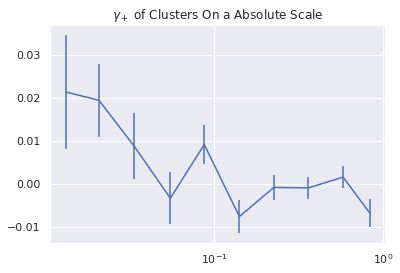

Aggregated xi:
[-1.734  -3.48   -2.5129  1.7078 -8.38   11.8149  2.0836  3.2147 -5.7346
 12.9768]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -350.8621  -693.9125  -968.7822 -1460.5076 -2241.7696 -3026.8701
 -3597.3005 -3351.124  -2062.8542  -348.6077]
------------------------------------------------------------------------------
Aggregated npairs:
[  81.  179.  285.  503.  918. 1542. 2409. 3276. 3746. 1885.]
------------------------------------------------------------------------------
Mean xi:
[-0.0214 -0.0194 -0.0088  0.0034 -0.0091  0.0077  0.0009  0.001  -0.0015
  0.0069]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3316 -3.8766 -3.3992 -2.9036 -2.442  -1.963  -1.4933 -1.0229 -0.5507
 -0.1849]
------------------------------------------------------------------------------


In [20]:
plt_w_error(mean_abs[1],-mean_abs[0],sig_abs,r"$\gamma_+$ of Clusters On a Absolute Scale ")
print_data(sum_abs,mean_abs)

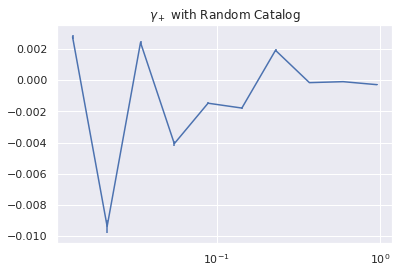

[ 2.7867e-03 -9.3750e-03  2.4187e-03 -4.0667e-03 -1.4733e-03 -1.7840e-03
  1.9193e-03 -1.5397e-04 -9.1733e-05 -2.8472e-04]
[-1.1850e-04  3.9866e-04 -1.0285e-04  1.7294e-04  6.2652e-05  7.5862e-05
 -8.1615e-05  6.5473e-06  3.9009e-06  1.2108e-05]


In [21]:
plt_w_error(r_meanlogr,-r_xi,r_sigma,r"$\gamma_+$ with Random Catalog")
print(-r_xi)
print(r_sigma)

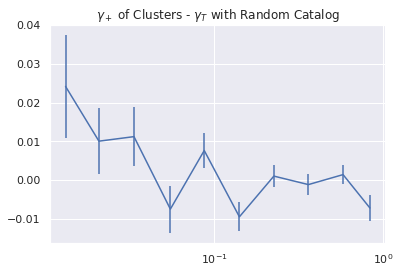

In [22]:
plt_w_error(mean_abs[1],-(mean_abs[0]+r_xi),np.hypot(r_sigma,sig_abs),r"$\gamma_+$ of Clusters - $\gamma_T$ with Random Catalog")

# Rel plots

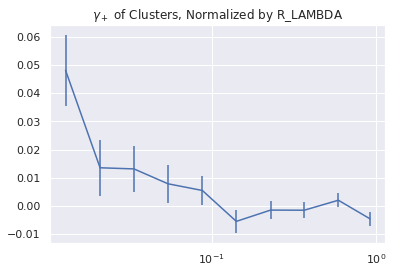

Aggregated xi:
[-2.0248 -1.8287 -3.0624 -2.8434 -3.9701  6.9485  3.0036  4.5984 -7.3568
 15.6873]
------------------------------------------------------------------------------
Aggregated meanlogr:
[ -182.4336  -521.2252  -789.2604 -1053.8904 -1762.7262 -2466.5486
 -2960.123  -2999.0859 -1944.4034  -303.7269]
------------------------------------------------------------------------------
Aggregated npairs:
[  42.  135.  233.  362.  725. 1261. 2004. 2978. 3670. 3427.]
------------------------------------------------------------------------------
Mean xi:
[-0.0482 -0.0135 -0.0131 -0.0079 -0.0055  0.0055  0.0015  0.0015 -0.002
  0.0046]
------------------------------------------------------------------------------
Mean meanlogr:
[-4.3437 -3.8609 -3.3874 -2.9113 -2.4313 -1.956  -1.4771 -1.0071 -0.5298
 -0.0886]
------------------------------------------------------------------------------


<Figure size 432x288 with 0 Axes>

In [23]:
plt_w_error(mean_rel[1],-mean_rel[0],sig_rel,r"$\gamma_+$ of Clusters, Normalized by R_LAMBDA")
print_data(sum_rel,mean_rel)